In [1]:
%matplotlib notebook

from histograms import *
from objects import createObjects
from datasets import filesets, getEvents, runOverDataSets, runAndAccum
from weights import addWeights
from common import createSelection
from plotter import make1DHistogram,makeStackPlot
import matplotlib.pyplot as plt

In [2]:
print(filesets)
all_events = getEvents(filesets, ["TT2018", "QCD2018","Diboson2018","ST2018","signal_2000_1900_Skim"
                                  ,"signal_1500_400_Skim","signal_1000_400_Skim"])

{'QCD2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/QCD2018.root'], 'Diboson2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/Diboson2018.root'], 'WQQ2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/WQQ2018.root'], 'ZQQ2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/ZQQ2018.root'], 'ST2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/ST2018.root'], 'ZNuNu2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/ZNuNu2018.root'], 'TT2018': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/TT2018.root'], 'signal_1000_400_Skim': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Skim_2023_05_11/signal_1000_400_Skim.root'], 'signal_1000_600_Skim': ['root://cmsxrootd.fnal.gov//store/user/ckapsiak/SingleStop/Skims/Ski

/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:200: RuntimeWarning: Missing cross-reference target for Electron_photonIdx => Photon
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Photon_electronIdx => Electron
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Photon_genPartIdx => GenPart
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Photon_jetIdx => Jet
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/cof

In [8]:
all_events

KeyboardInterrupt: 

In [3]:
all_events = runOverDataSets(createObjects, all_events)

In [4]:
def makeSelectionAndWeights(events):    
    sel = createSelection(events)
    events = events[sel.all(*sel.names)]
    events = addWeights(events)
    return events

In [5]:
events = runOverDataSets(makeSelectionAndWeights, all_events)

In [11]:
%matplotlib inline

def makeMassHist(events):
    gj = events.good_jets
    h1 = makeHistogram(mass_axis, events.metadata["dataset"], (gj[:,0] + gj[:,1] + gj[:,2]).mass , events.EventWeight )
    return h1

hists = runAndAccum(makeMassHist, events)
print(hists)

Hist(
  StrCategory(['TT2018', 'QCD2018', 'Diboson2018', 'ST2018', 'signal_2000_1900_Skim', 'signal_1500_400_Skim', 'signal_1000_400_Skim'], growth=True, name='dataset', label='Primary dataset'),
  Regular(150, 0, 3000, name='mass', label='$m$ [GeV]'),
  storage=Weight()) # Sum: WeightedSum(value=5.46804e+06, variance=2.81477e+08) (WeightedSum(value=5.48204e+06, variance=2.8149e+08) with flow)


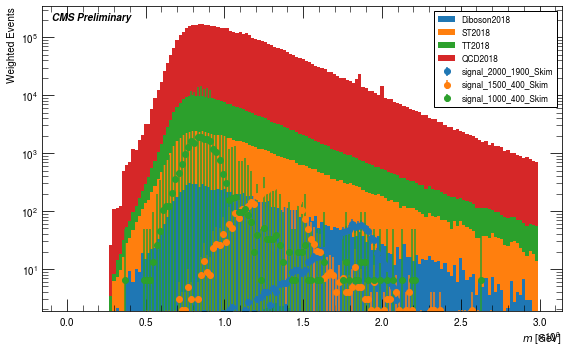

In [12]:
fig,ax = plt.subplots(figsize=(8,5))

makeStackPlot(ax,hists,signal=["signal_2000_1900_Skim","signal_1500_400_Skim","signal_1000_400_Skim"])